# College Event Feedback Analysis

**Internship project deliverable**

This notebook cleans and analyzes the `student_feedback.csv` dataset you uploaded and provides visualizations and recommendations. If you have a separate file with students' *written comments*, upload it and follow the `Sentiment Analysis` section (marked clearly).

In [21]:
# Imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.0)
pd.options.display.max_columns = 50

In [22]:
# Load the dataset
file_path = "C:\\Users\\91620\\Downloads\\pandas\\pandas\\student_feedback.csv"
df = pd.read_csv(file_path)
print('Loaded:', df.shape, 'rows x columns')
df.head()

Loaded: (1001, 10) rows x columns


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


## Data overview

- Inspect columns, types, and missing values. If there's an `Unnamed: 0` index column, it will be dropped. If you have a separate comments file, upload it to the same path and update the path below in the Sentiment Analysis section.

Average scores:
 Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


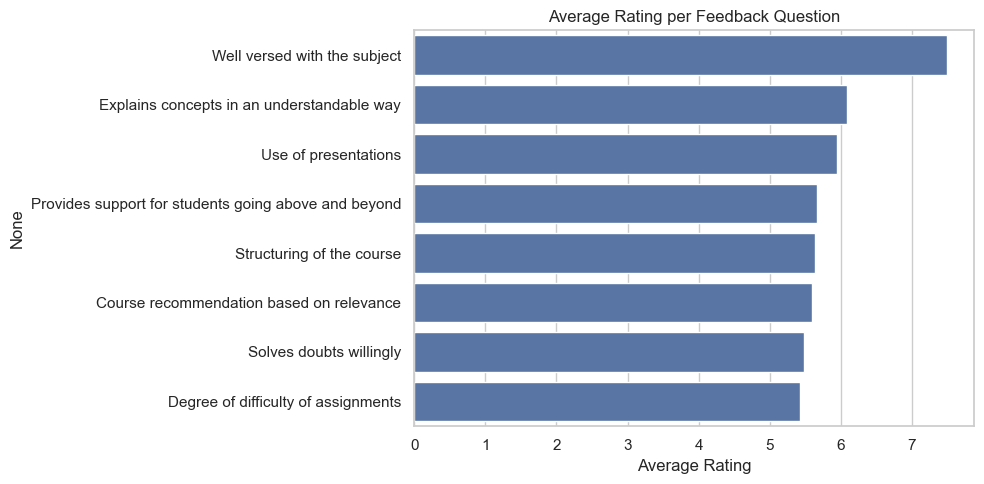

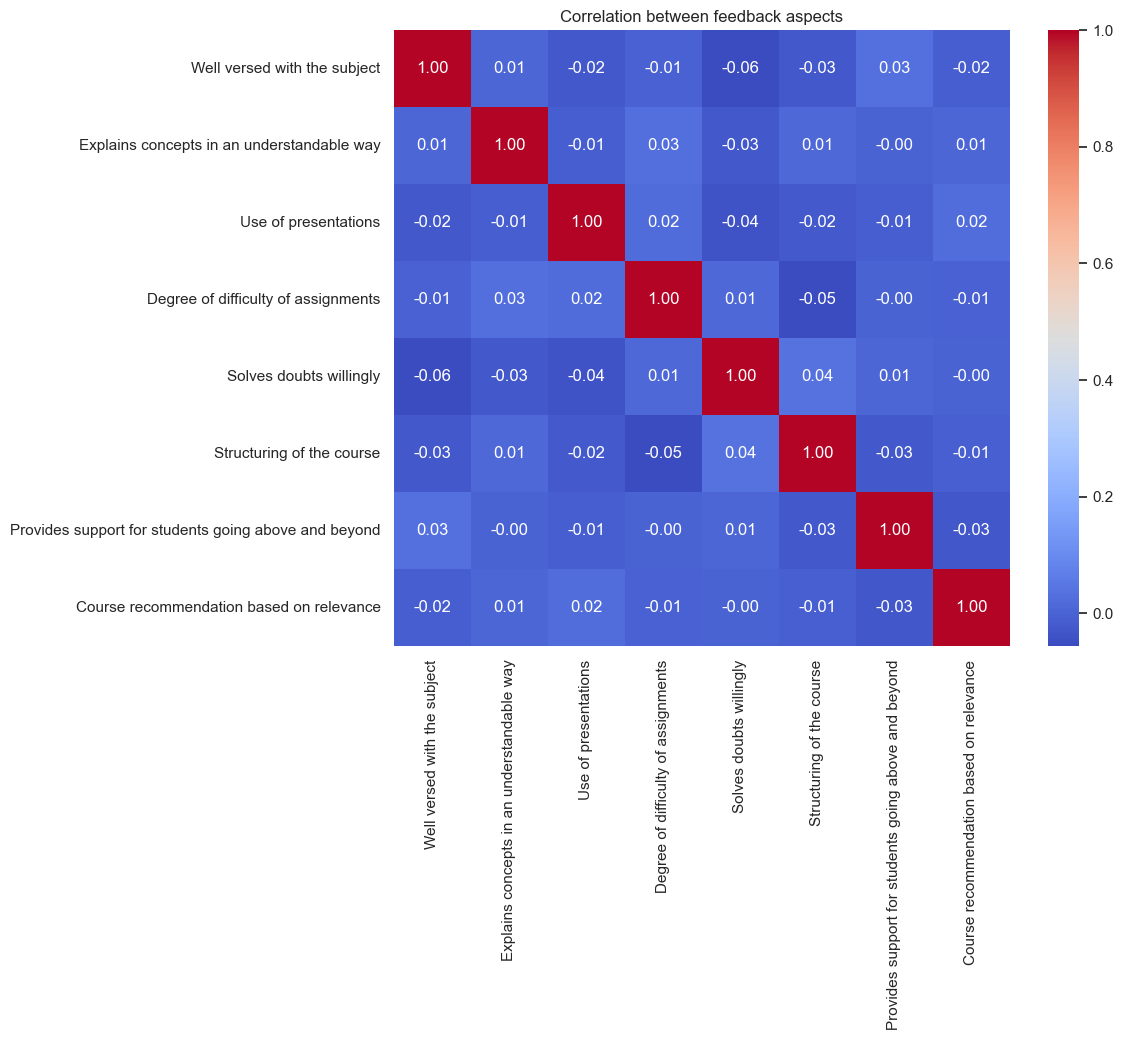

In [23]:
# Ratings analysis: averages, distributions
id_col = 'Student ID'  # Use the correct column name from your DataFrame
rating_cols = [c for c in df.columns if c not in ['Unnamed: 0', id_col]]
avg_scores = df[rating_cols].mean().sort_values(ascending=False)
print('Average scores:\n', avg_scores)

# Plot average ratings
plt.figure(figsize=(10,5))
sns.barplot(x=avg_scores.values, y=avg_scores.index)
plt.title('Average Rating per Feedback Question')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df[rating_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation between feedback aspects')
plt.show()

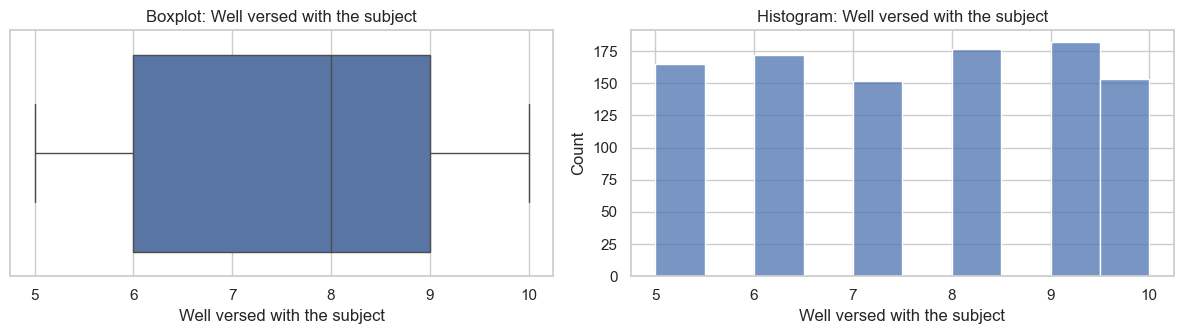

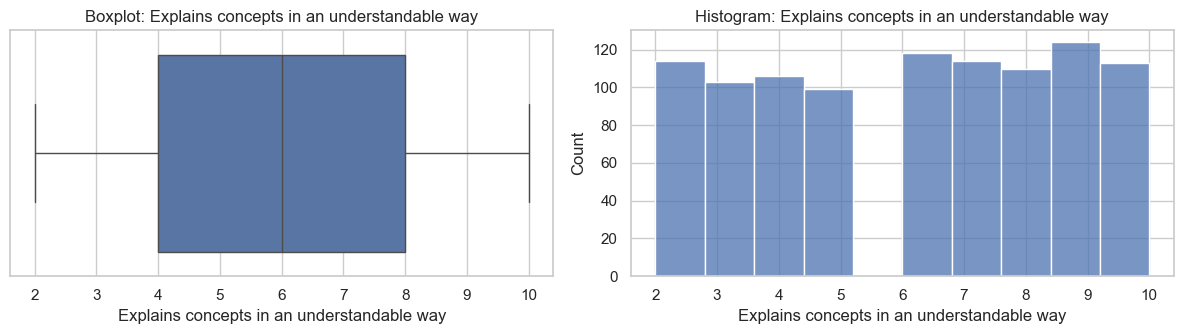

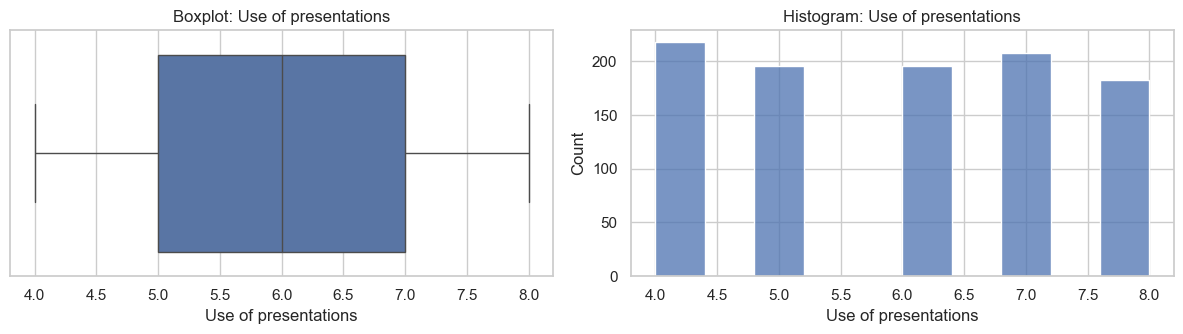

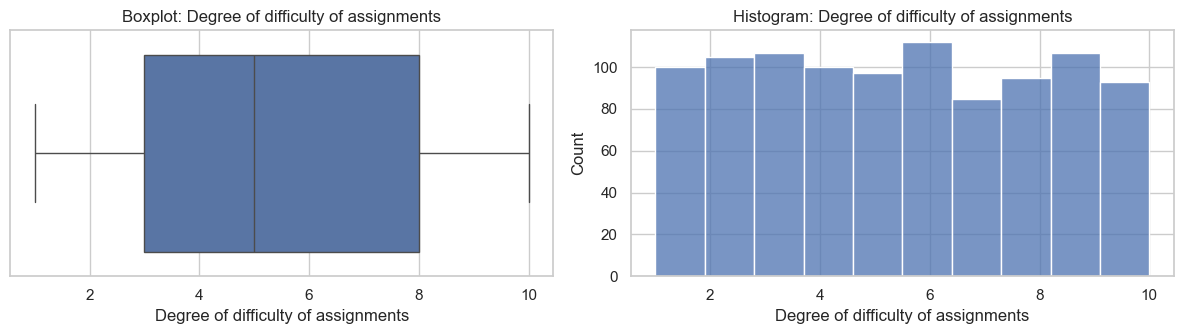

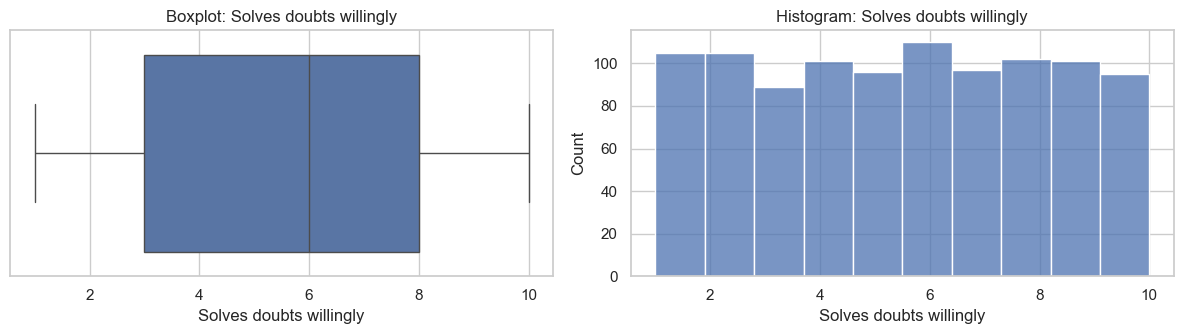

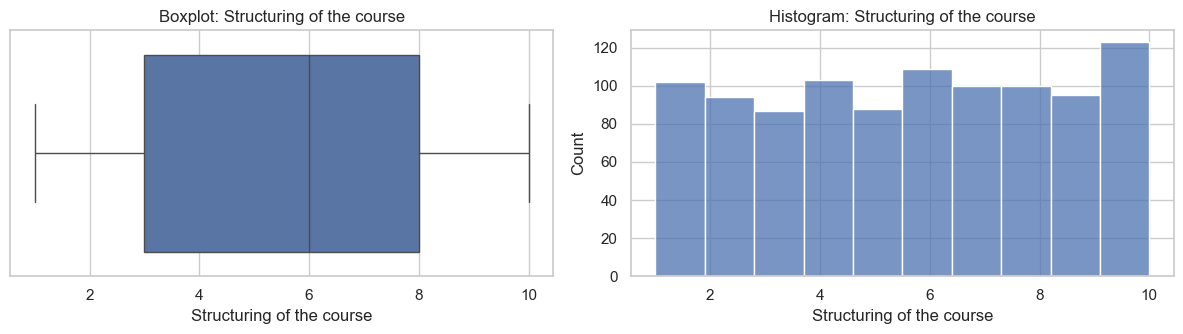

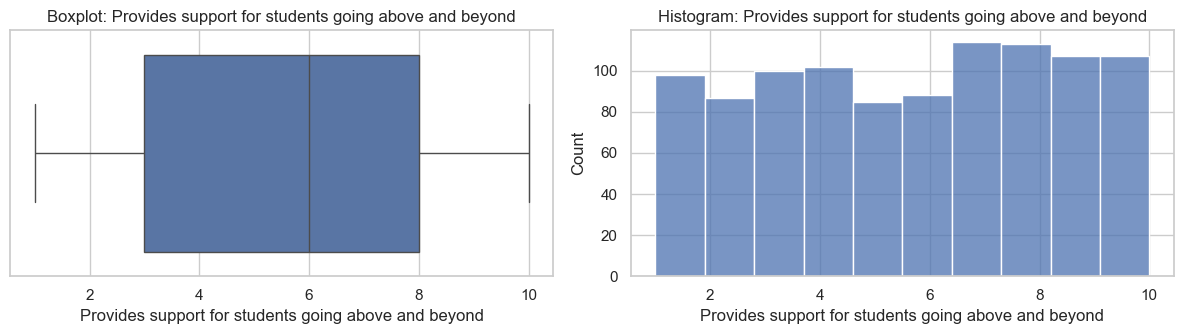

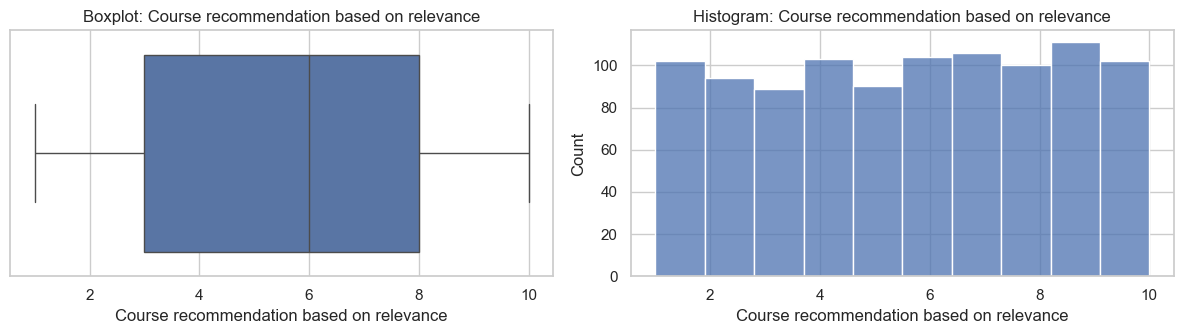

In [7]:
# Distribution plots for each rating question (boxplots + histograms)
for c in rating_cols:
    fig, axes = plt.subplots(1,2, figsize=(12,3.5))
    sns.boxplot(x=df[c], ax=axes[0])
    axes[0].set_title(f'Boxplot: {c}')
    sns.histplot(df[c].dropna(), bins=10, kde=False, ax=axes[1])
    axes[1].set_title(f'Histogram: {c}')
    plt.tight_layout()
    plt.show()

## Insights & Recommendations

Use the averages and correlation results above to write findings. Example recommendations:

- Offer faculty mentoring to improve doubt-solving and student support.
- Revisit course structure to make it more modular.
- Provide additional resources for challenging assignments.
- Increase interactive/visual content in presentations.

Replace these with real actionable items after reviewing the visualizations.


## Sentiment Analysis (PLACEHOLDER)

**Status:** No open-ended comments file detected.

If you have a CSV/Excel with a column containing student comments (e.g. `comments`, `feedback`, `suggestions`), upload it to `/mnt/data/comments.csv` (or change the path below) and run the cell in this section.

**Instructions (TextBlob & VADER):**
1. Install required packages in Colab:
```bash
!pip install textblob nltk
``` 
Then in Python:
```python
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

comments = pd.read_csv('/mnt/data/comments.csv')
text_col = 'comments'  # change if required

# TextBlob polarity
comments['polarity'] = comments[text_col].astype(str).apply(lambda t: TextBlob(t).sentiment.polarity)

# VADER compound score
sid = SentimentIntensityAnalyzer()
comments['vader_compound'] = comments[text_col].astype(str).apply(lambda t: sid.polarity_scores(t)['compound'])

# Classify
comments['sentiment_textblob'] = comments['polarity'].apply(lambda x: 'positive' if x>0.05 else ('negative' if x<-0.05 else 'neutral'))
comments['sentiment_vader'] = comments['vader_compound'].apply(lambda x: 'positive' if x>=0.05 else ('negative' if x<=-0.05 else 'neutral'))

# Quick summary
print(comments['sentiment_vader'].value_counts(normalize=True))
```

2. Create a pie chart of sentiment shares and a word cloud for positive/negative comments.

> If you don't have actual comments, you can create a small sample CSV with a `comments` column for demo purposes.


In [25]:
# Save aggregated results to CSV for reporting
out_summary = pd.DataFrame({'aspect': avg_scores.index, 'avg_score': avg_scores.values})
out_summary.to_csv("C:\\Users\\91620\\Downloads\\feedback_summary_by_aspect.csv", index=False)
# ...existing code..., index=False)
print('Saved feedback_summary_by_aspect.csv to /mnt/data/')


# Save example plots as PNG (optional)
# (Re-run plotting cells before running this save block to ensure figures exist in the session.)

Saved feedback_summary_by_aspect.csv to /mnt/data/


## Deliverables included

- `college_event_feedback_analysis.ipynb` (this notebook)
- `feedback_summary_by_aspect.csv` (generated when you run the Save cell)
- `college_event_feedback_analysis.pdf` (a quick-summary PDF was previously generated; re-run notebook and export as desired)

---

If you want, I can now:
1. Run sentiment analysis for you using *synthetic* sample comments to demonstrate (I will state clearly that they are synthetic), **OR**
2. Wait for you to upload the real comments file and then run the sentiment analysis and update the PDF.

Which do you prefer?